In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Chrome tracing viewer colors are picked from a list of reserved names, see [docs](https://chromium.googlesource.com/external/trace-viewer/+/bf55211014397cf0ebcd9e7090de1c4f84fc3ac0/tracing/tracing/ui/base/color_scheme.html).

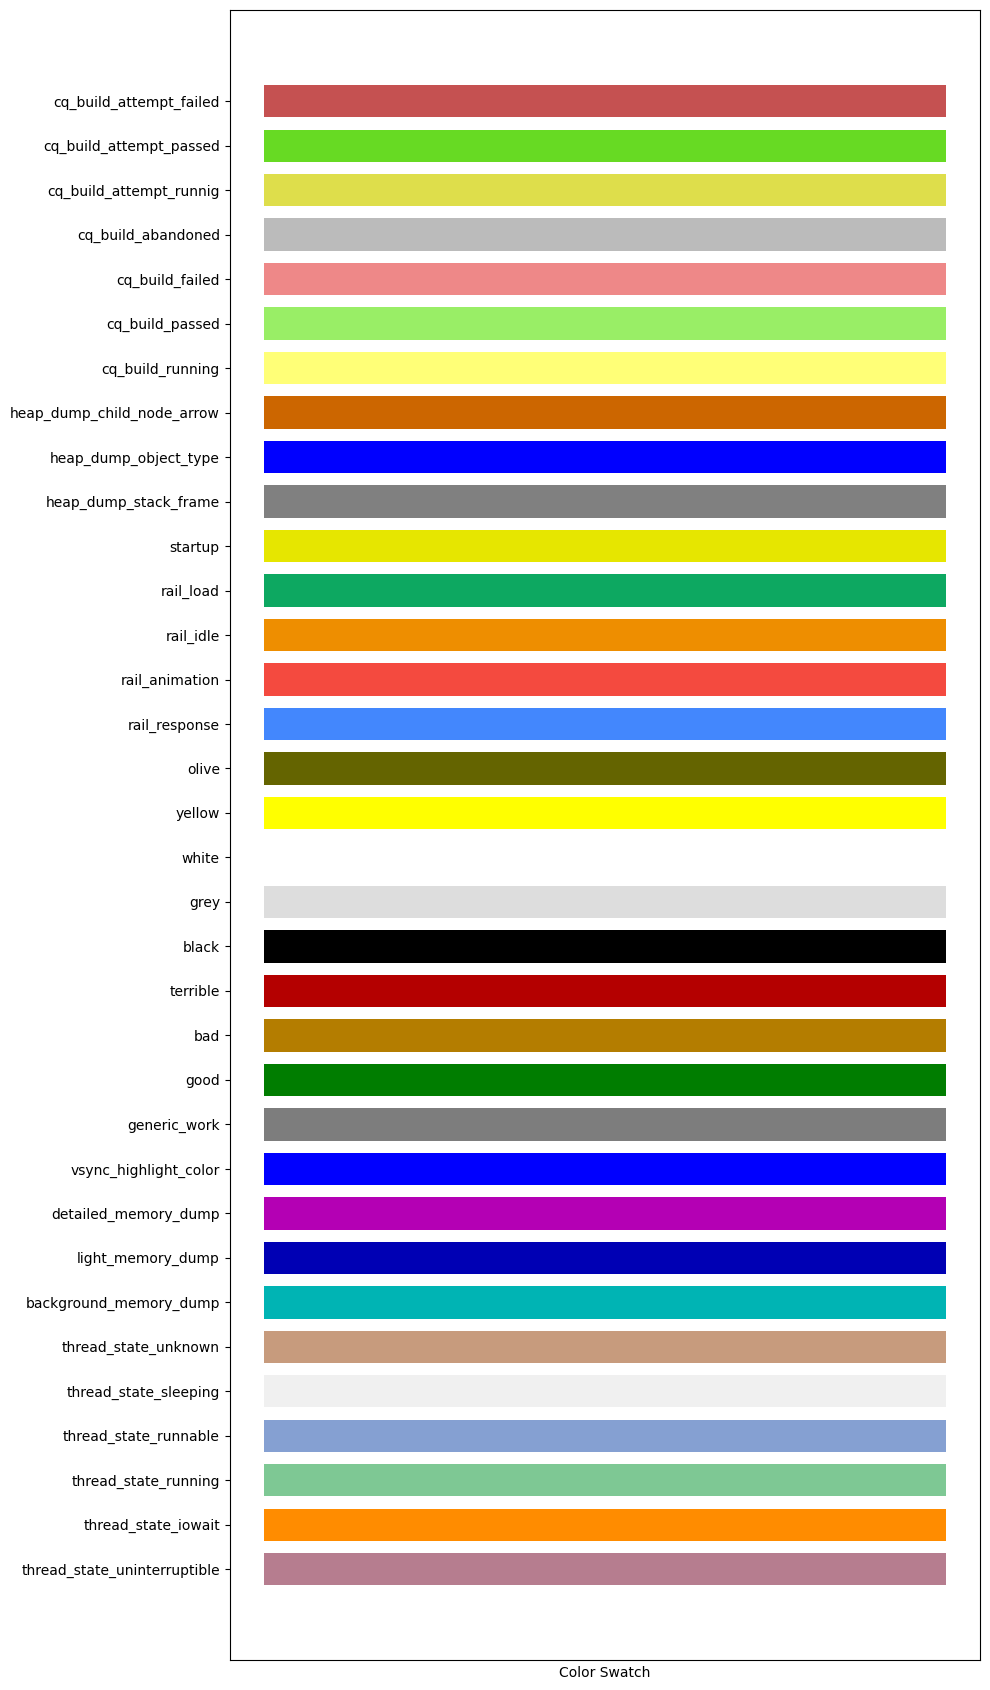

In [2]:
colors = {
    "thread_state_uninterruptible": (182/255, 125/255, 143/255),
    "thread_state_iowait": (255/255, 140/255, 0/255),
    "thread_state_running": (126/255, 200/255, 148/255),
    "thread_state_runnable": (133/255, 160/255, 210/255),
    "thread_state_sleeping": (240/255, 240/255, 240/255),
    "thread_state_unknown": (199/255, 155/255, 125/255),
    "background_memory_dump": (0/255, 180/255, 180/255),
    "light_memory_dump": (0/255, 0/255, 180/255),
    "detailed_memory_dump": (180/255, 0/255, 180/255),
    "vsync_highlight_color": (0/255, 0/255, 255/255),
    "generic_work": (125/255, 125/255, 125/255),
    "good": (0/255, 125/255, 0/255),
    "bad": (180/255, 125/255, 0/255),
    "terrible": (180/255, 0/255, 0/255),
    "black": (0/255, 0/255, 0/255),
    "grey": (221/255, 221/255, 221/255),
    "white": (255/255, 255/255, 255/255),
    "yellow": (255/255, 255/255, 0/255),
    "olive": (100/255, 100/255, 0/255),
    "rail_response": (67/255, 135/255, 253/255),
    "rail_animation": (244/255, 74/255, 63/255),
    "rail_idle": (238/255, 142/255, 0/255),
    "rail_load": (13/255, 168/255, 97/255),
    "startup": (230/255, 230/255, 0/255),
    "heap_dump_stack_frame": (128/255, 128/255, 128/255),
    "heap_dump_object_type": (0/255, 0/255, 255/255),
    "heap_dump_child_node_arrow": (204/255, 102/255, 0/255),
    "cq_build_running": (255/255, 255/255, 119/255),
    "cq_build_passed": (153/255, 238/255, 102/255),
    "cq_build_failed": (238/255, 136/255, 136/255),
    "cq_build_abandoned": (187/255, 187/255, 187/255),
    "cq_build_attempt_runnig": (222/255, 222/255, 75/255),
    "cq_build_attempt_passed": (103/255, 218/255, 35/255),
    "cq_build_attempt_failed": (197/255, 81/255, 81/255)
}

fig, ax = plt.subplots(figsize=(10, len(colors) * 0.5))

for i, (name, rgb) in enumerate(colors.items()):
    ax.broken_barh([(0, 10)], (i * 1.1, 0.8), facecolors=rgb)

ax.set_yticks([i * 1.1 + 0.4 for i in range(len(colors))])
ax.set_yticklabels(colors.keys())
ax.set_xlabel('Color Swatch')
ax.set_xticks([]) 

plt.tight_layout()
plt.show()

In [3]:
producer_task_name = "task::MapBatches(produce_video_slices)"
consumer_task_name = "task::MapBatches(preprocess_video)"
no_parallel_task_name = "task::MapBatches(produce_video_slices)->MapBatches(preprocess_video)"
gpu_task_name = "task::MapBatches(Classifier)"

color = {producer_task_name: "rail_response", consumer_task_name: "cq_build_passed", no_parallel_task_name: "rail_load", gpu_task_name: "cq_build_failed"}

In [4]:
directory = "/home/ubuntu/ray-data-eval/ray_data_eval/video_inference/long_video/logs/"
file_paths = [
    os.path.join(directory, "Dynamic parallelism.json"),
    os.path.join(directory, "$N=4, M=4$.json"),
    os.path.join(directory, "$N=1, M=7$.json"),
    os.path.join(directory, "$N=7, M=1$.json")
]

In [5]:
def process_file(file_path):
    df = pd.read_json(file_path)

    filtered_df = df[df['cat'].isin(color.keys())]

    # Modify the event title
    filtered_df.loc[:, 'name'] = filtered_df['cat'].apply(lambda x: x.replace("task::MapBatches(", "").replace(")", ""))

    # Modify the color
    filtered_df.loc[:, 'cname'] = filtered_df['cat'].apply(lambda x: color[x])

    new_file_name = os.path.basename(file_path).replace(".json", "_modified.json")
    new_file_path = os.path.join(directory, new_file_name)
    filtered_df.to_json(new_file_path, orient='records')

    print(f"Processed and saved modified data to {new_file_path}")

# Process each file
for file_path in file_paths:
    process_file(file_path)

Processed and saved modified data to /home/ubuntu/ray-data-eval/ray_data_eval/video_inference/long_video/logs/Dynamic parallelism_modified.json
Processed and saved modified data to /home/ubuntu/ray-data-eval/ray_data_eval/video_inference/long_video/logs/$N=4, M=4$_modified.json
Processed and saved modified data to /home/ubuntu/ray-data-eval/ray_data_eval/video_inference/long_video/logs/$N=1, M=7$_modified.json
Processed and saved modified data to /home/ubuntu/ray-data-eval/ray_data_eval/video_inference/long_video/logs/$N=7, M=1$_modified.json
